# Pain Analysis¶

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Read in filtered data
file_path = 'filtered_data.csv'
df = pd.read_csv(file_path)
df.shape

(26141, 47)

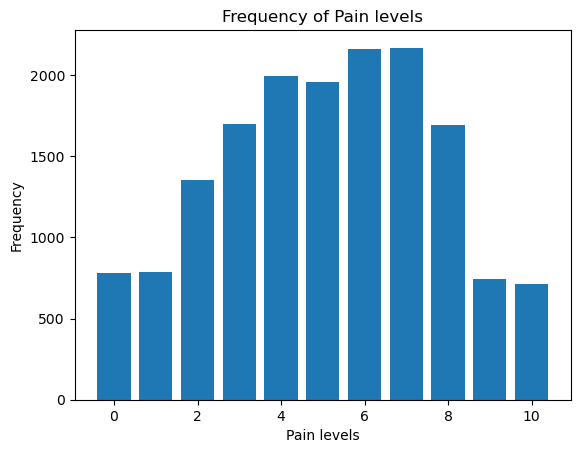

In [4]:
# Count the frequency of each category
pain_lvl_cnt = df['pain_level'].value_counts()
plt.bar(pain_lvl_cnt.index, pain_lvl_cnt.values)
plt.xlabel('Pain levels')
plt.ylabel('Frequency')
plt.title('Frequency of Pain levels')
plt.show()

In [5]:
# Get data during period
on_period = df[df['period'] == 1]

# Get data outside period
off_period = df[df['period'] == 0]

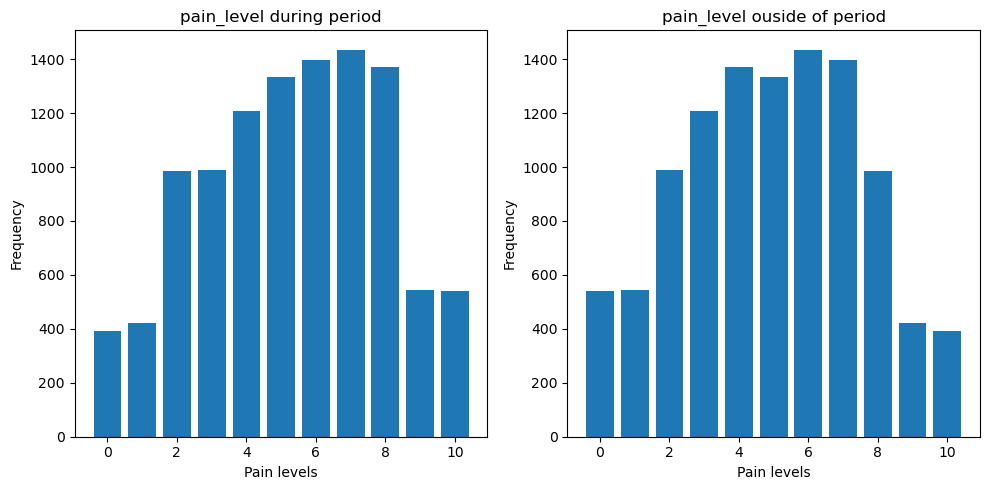


T-statistic: -3.363
P-value: 0.003

There is a significant difference between the two groups.


In [6]:
# A/B testing on pain levels symptoms during period and outside period

# Pain_levels on/off period
pain_on = on_period['pain_level'].value_counts()
pain_off = off_period['pain_level'].value_counts()

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(pain_on.index, pain_off.values)
ax1.set_title('pain_level during period')
ax1.set_xlabel('Pain levels')
ax1.set_ylabel('Frequency')
ax2.bar(pain_off.index, pain_off.values)
ax2.set_title('pain_level ouside of period')
ax2.set_xlabel('Pain levels')
ax2.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('pain_levels.png', dpi=300)  
plt.show()

# Independent t-test
t_stat, p_value = stats.ttest_ind(pain_on, pain_off)
print("\nT-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 3))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference between the two groups.")
else:
    print("\nThere is no significant difference between the two groups.")


T-statistic for overall_pain: -2.006
P-value for overall_pain: 0.115
NO significant difference in overall_pain between the two groups.


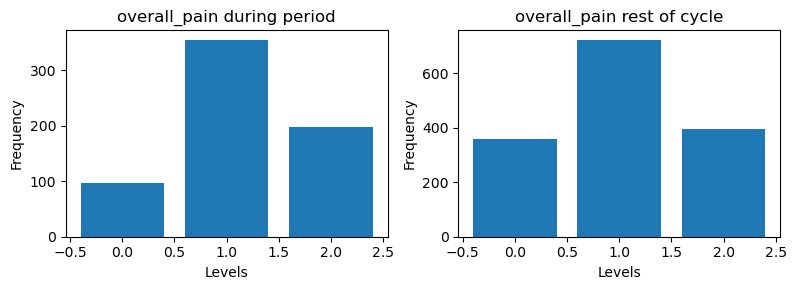


T-statistic for bloating: -2.318
P-value for bloating: 0.081
NO significant difference in bloating between the two groups.


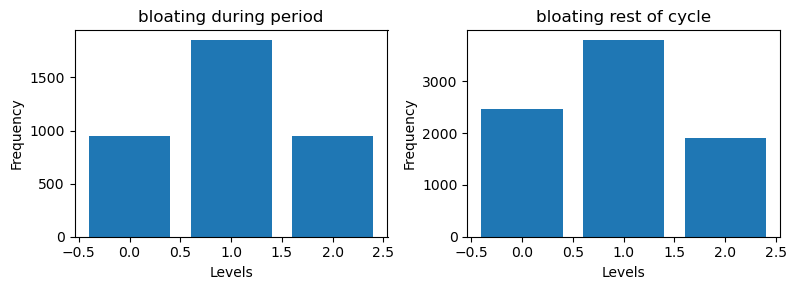


T-statistic for appetite_loss: -1.911
P-value for appetite_loss: 0.129
NO significant difference in appetite_loss between the two groups.


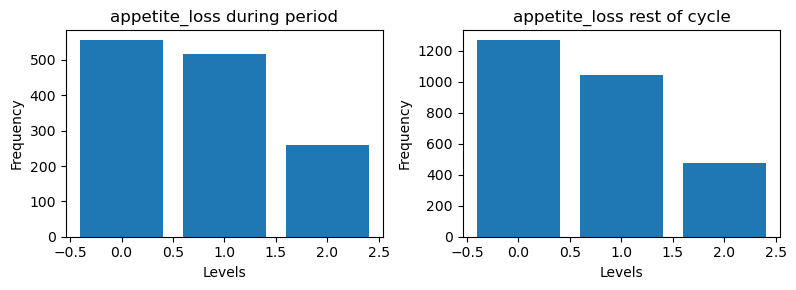


T-statistic for tiredness: -2.78
P-value for tiredness: 0.05
SIGNIFICANT difference in tiredness between the two groups.


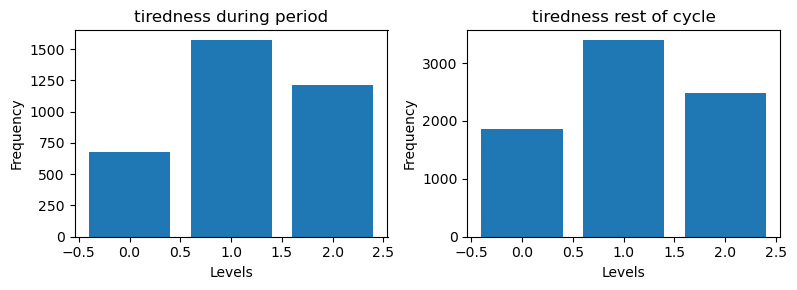


T-statistic for fever: -0.679
P-value for fever: 0.534
NO significant difference in fever between the two groups.


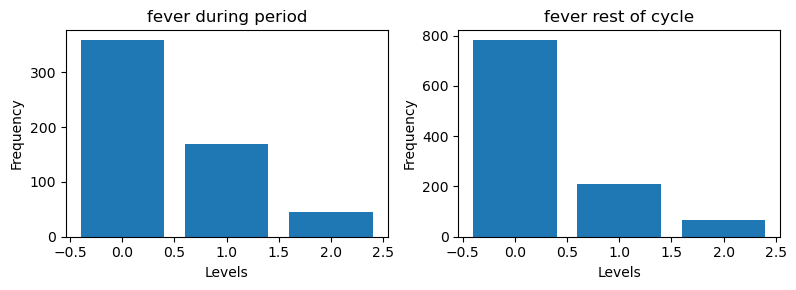


T-statistic for backaches: -1.966
P-value for backaches: 0.121
NO significant difference in backaches between the two groups.


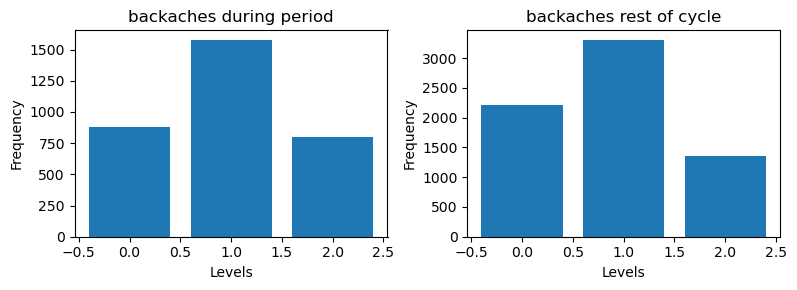


T-statistic for bodyaches: -1.958
P-value for bodyaches: 0.122
NO significant difference in bodyaches between the two groups.


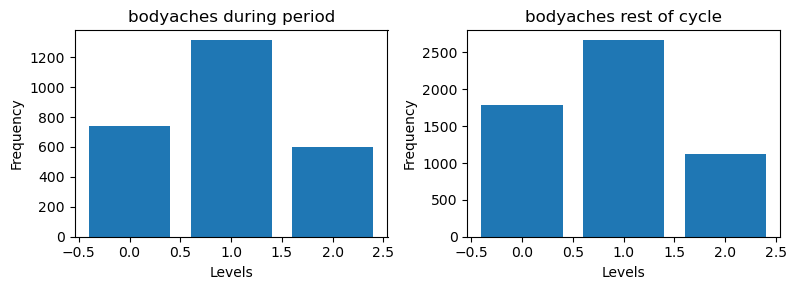


T-statistic for stomach_cramps: -2.575
P-value for stomach_cramps: 0.062
NO significant difference in stomach_cramps between the two groups.


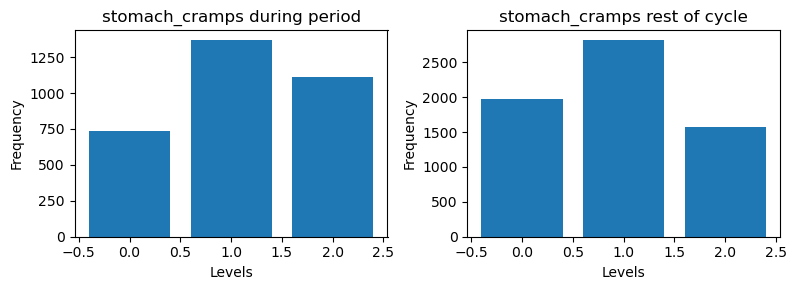


T-statistic for headache: -1.561
P-value for headache: 0.193
NO significant difference in headache between the two groups.


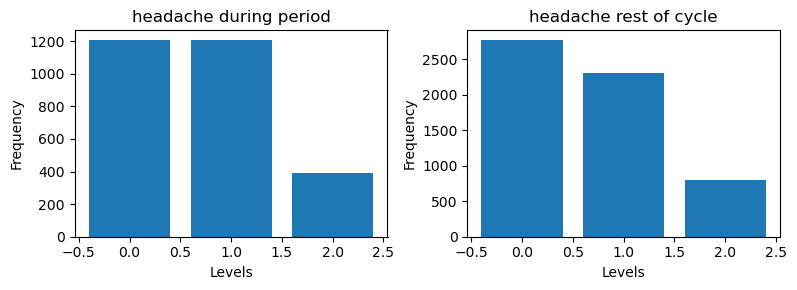


T-statistic for indigestion: -1.551
P-value for indigestion: 0.196
NO significant difference in indigestion between the two groups.


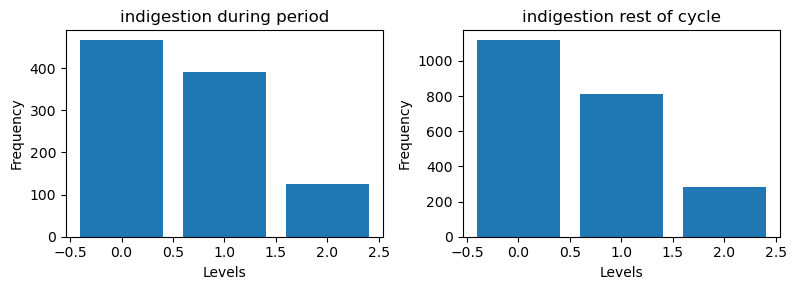


T-statistic for constipation: -1.977
P-value for constipation: 0.119
NO significant difference in constipation between the two groups.


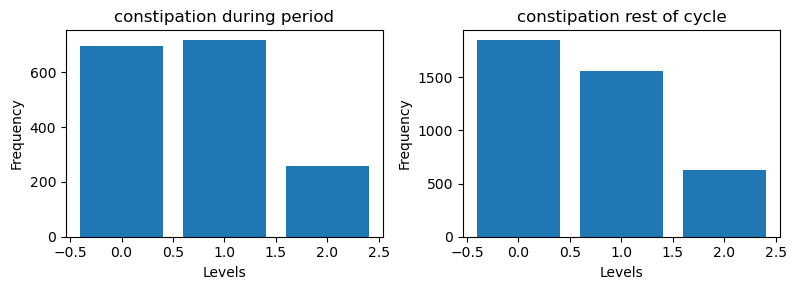


T-statistic for diarrhea: -1.444
P-value for diarrhea: 0.222
NO significant difference in diarrhea between the two groups.


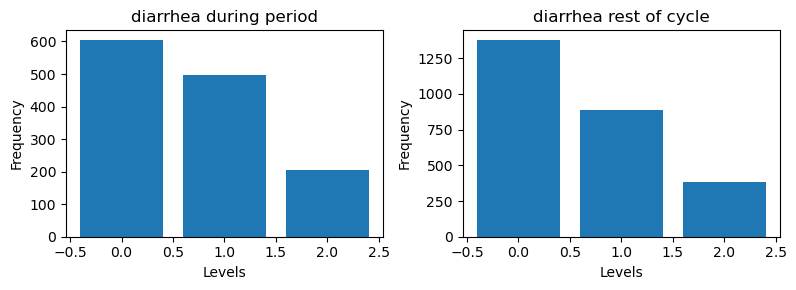


T-statistic for nausea: -1.882
P-value for nausea: 0.133
NO significant difference in nausea between the two groups.


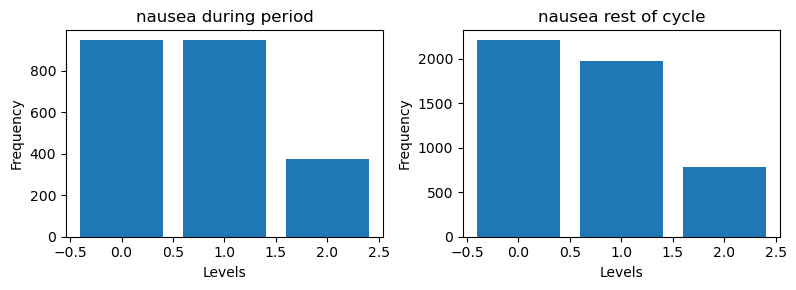


T-statistic for vomiting: -0.818
P-value for vomiting: 0.459
NO significant difference in vomiting between the two groups.


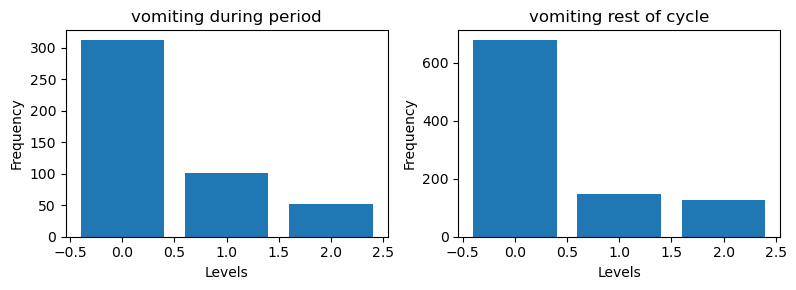


T-statistic for temperature: -0.995
P-value for temperature: 0.376
NO significant difference in temperature between the two groups.


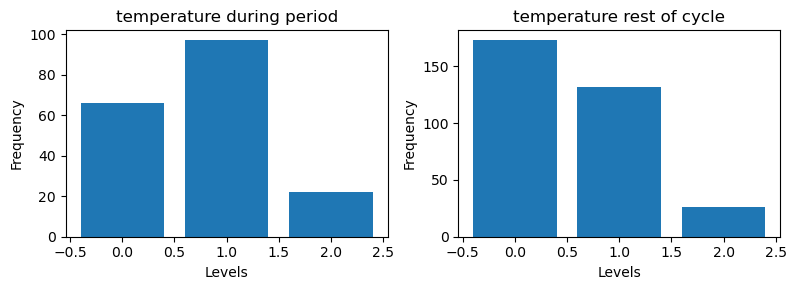


T-statistic for hot_flashes: -1.916
P-value for hot_flashes: 0.128
NO significant difference in hot_flashes between the two groups.


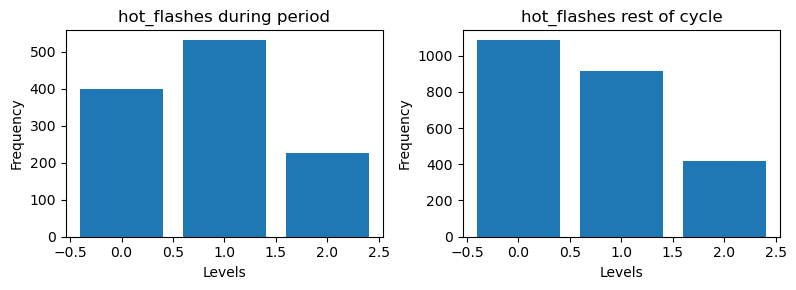


T-statistic for insomnia: -2.618
P-value for insomnia: 0.059
NO significant difference in insomnia between the two groups.


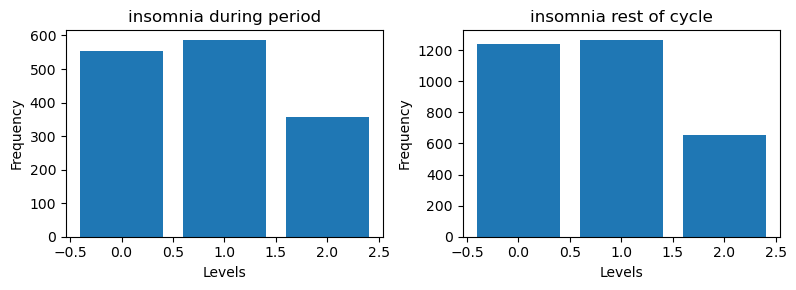

In [7]:
# List of variables to plot
variables = ['overall_pain', 'bloating', 'appetite_loss', 'tiredness', 'fever', 
             'backaches','bodyaches', 'stomach_cramps', 'headache', 'indigestion', 'constipation',
             'diarrhea', 'nausea', 'vomiting', 'temperature', 'hot_flashes', 'insomnia'] 
       
# A/B testing during period and outside period for each variable of interest by cluster
for var in variables:

    # var on/off period
    var_on = on_period[var].value_counts()
    var_off = off_period[var].value_counts()
    
    # Independent t-test
    t_stat, p_value = stats.ttest_ind(var_on, var_off)
    print(f"\nT-statistic for {var}: {round(t_stat, 3)}")
    print(f"P-value for {var}: {round(p_value, 3)}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f'SIGNIFICANT difference in {var} between the two groups.')
    else:
        print(f'NO significant difference in {var} between the two groups.')

    # Plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
    ax1.bar(var_on.index, var_on.values)
    ax1.set_title(f'{var} during period')
    ax1.set_xlabel('Levels')
    ax1.set_ylabel('Frequency')
    ax2.bar(var_off.index, var_off.values)
    ax2.set_title(f'{var} rest of cycle')
    ax2.set_xlabel('Levels')
    ax2.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{var}.png', dpi=300)  
    plt.show()
